In [3]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import holoviews as hv
import numpy as np
from gaussian import *
hv.notebook_extension()
%matplotlib inline

interval = 10
interval_size = 0.01

mpl.rcParams.update({'font.size':14})
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'
mpl.rcParams['lines.linewidth'] = 4
plt.rc('text', usetex=True)

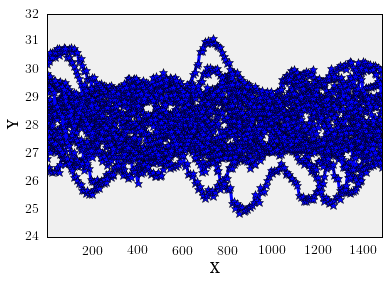

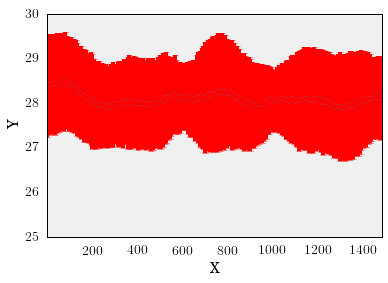

In [13]:
samples = 20
ndim =200
length = 1480
sigma_v = 0.1
l=100
sigma_f=1
uniform=False


dots=True
usecolors=False
lw=3
xname="X"
yname="Y"
ylim=30
filename="presentation5"

x,y,cov = genGP(samples=samples, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, uniform=uniform, dots=dots, lw=lw, xname=xname, yname=yname, usecolors=usecolors, filename=filename)

In [3]:
nsample=3
sample_x = np.random.uniform(1,length,nsample)
sample_x.sort()
sample_y = np.cos(sample_x)
sample_y.shape
y.shape

(200, 20)

In [14]:
mu,cov = inference(sample_x, sample_y, x, cov, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f)

In [15]:
sample_x.shape
sample_y.shape
data = np.array((sample_x,sample_y))

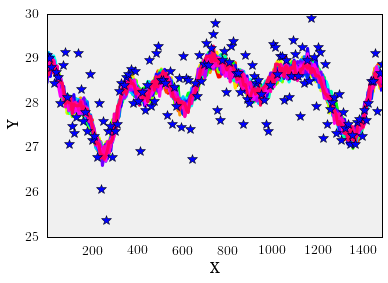

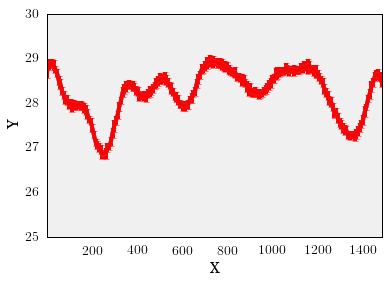

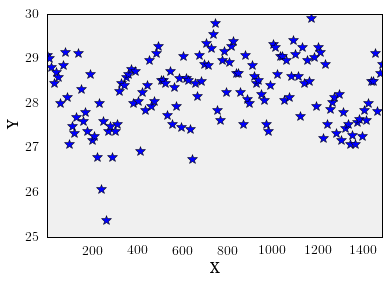

In [16]:
y=np.random.multivariate_normal(mu, cov, samples).T
plotGP(x,y,xlim=length,data=data,filename="presentation")


In [1]:
def k(i,j,sigma_f,l):
    return np.power(sigma_f,2)*np.exp(-(np.power((i[0]-j[0]),2)/(2*np.power(l,2)) + np.power((i[1]-j[1]),2)/(2*np.power(l,2))))

def direct_delta(i,j):
    if (i==j):
        return 1
    else:
        return 0

def sigma(ndim=6,length=6,uniform=False,sigma_v=0,l=1,sigma_f=1):
    if (uniform):
        x = np.random.uniform(1,length,ndim)
        x.sort()
        y = np.random.uniform(1,length,ndim)
        y.sort()
    else:
        x = np.linspace(1, length, ndim)
        y = np.linspace(1, length, ndim)
    [X,Y] = np.meshgrid(x,y)
    X = X.flatten()
    Y = Y.flatten()
    cov = np.zeros((ndim*ndim,ndim*ndim))
    for i in range(ndim*ndim):
        for j in range(ndim*ndim):
                    cov[i,j]=k((X[i],Y[i]),(X[j],Y[j]),sigma_f,l)
    return cov,X,Y

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x.flatten(),y.flatten(),z.flatten(), cmap=cm.jet)
plt.savefig('../FinalReport/Pictures/Introduction/2dregression.png', dpi=200,bbox_inches='tight')
fig.show()


NameError: name 'plt' is not defined

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: covariance is not positive-semidefinite.


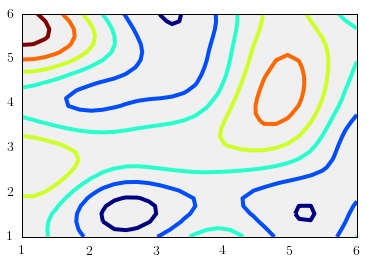

In [33]:
from matplotlib import cm

samples=1
ndim=30
cov,x,y = sigma(ndim,uniform=False)
mu=np.zeros(ndim*ndim)
z=np.random.multivariate_normal(mu, cov, samples).T
z = z.reshape(ndim,ndim).T
x = x.reshape(ndim,ndim).T
y = y.reshape(ndim,ndim).T

surf = plt.contour(x,y,z,cmap=cm.jet)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('../FinalReport/Pictures/Introduction/2dregressionc.png', dpi=200,bbox_inches='tight')
plt.show()




/home/martin/Dropbox/MSc/ASR/report/gaussian.py:169: RuntimeWarning: covariance is not positive-semidefinite.
  y=np.random.multivariate_normal(mu, cov, samples).T


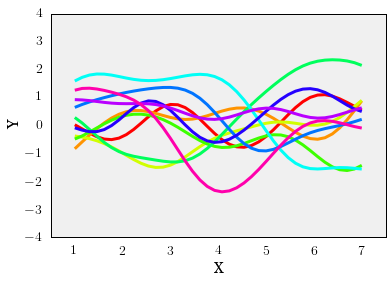

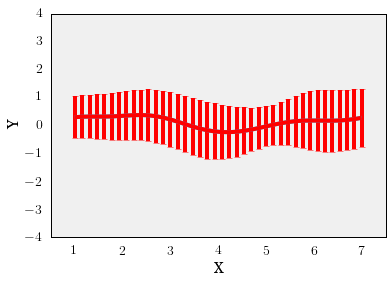

In [2]:
samples = 10
ndim = 40
length = 7
sigma_v = 0
l=1
sigma_f=1
uniform=False


dots=False
usecolors=True
lw=3
xname="X"
yname="Y"
ylim=4
filename="presentation5"

x,y,cov = genGP(samples=samples, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, uniform=uniform, dots=dots, lw=lw, xname=xname, yname=yname, ylim=ylim, usecolors=usecolors, filename=filename)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: covariance is not positive-semidefinite.


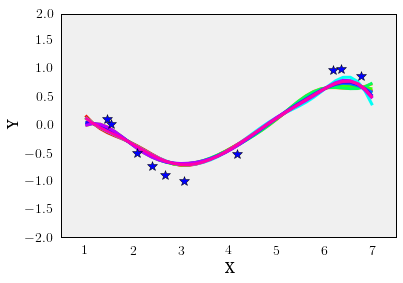

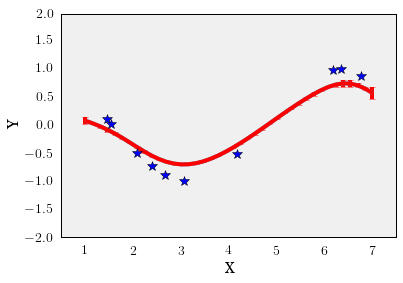

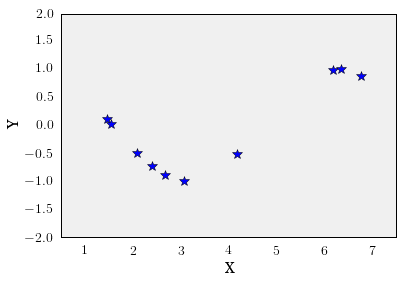

In [5]:
nsample=10
sample_x = np.random.uniform(1,length,nsample)
sample_x.sort()
sample_y = np.cos(sample_x)

mu,cov = inference(sample_x, sample_y, x, cov, ndim=ndim, length=length, sigma_v=sigma_v, l=l, sigma_f=sigma_f, sigma_n=1)

data = np.array((sample_x,sample_y))

y=np.random.multivariate_normal(mu, cov, samples).T
plotGP(x,y,xlim=length,ylim=2,data=data,filename="presentation")


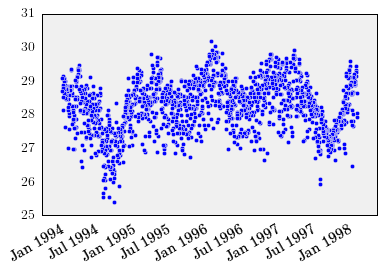

In [5]:
import csv
import matplotlib.pyplot as plt
import datetime
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import matplotlib.dates as mdates



def difference(a,b,diff=0.05):
    if (abs(a-b)<0.05):
        return True
    else:
        return False

with open('data', 'rt') as f:
    reader = csv.reader(f)
    data = list(reader)

datadict = []
for entry in data:
    splitted = entry[0].split()
    try:
        datadict.append({'date':datetime.datetime(1900+int(splitted[1]),int(splitted[2]),int(splitted[3])), 'latitude':float(splitted[5]), 'longitude':float(splitted[6]), 'airtemp':float(splitted[10]), 'sstemp':float(splitted[11])})
    except:
        pass

datadict = sorted(datadict, key=lambda p: p['date'], reverse=True)
count = 0
x = []
y = []
z = []
samell = []
date = datadict[0]['date']
plt.close('all')
for i in range(0,len(datadict)):
    try:
        if (abs(datadict[i]['latitude']+5)<0.2 and abs(datadict[i]['longitude']-156) < 0.2):
            x.append(datadict[i]['date'])
            z.append(datadict[i]['airtemp'])

        """
        if(datadict[i]['date']==date):
            x.append(datadict[i]['latitude'])
            y.append(datadict[i]['longitude'])
            z.append(datadict[i]['airtemp'])
            print (1)
        else:
            date = datadict[i]['date']
            #fig = plt.figure()
            #ax = fig.add_subplot(111, projection='3d')
            #ax.plot_trisurf(x,y,z, cmap=cm.jet)
            #ax.savefig('Pictures/' + str(count) + '.png', dpi=200,bbox_inches='tight')
            #fig.show()
            count+=1
            x = []
            y = []
            z = []
        """
    except:
        pass
datadict[0].items()
#print (len(datadict))
#print (len(samell))
#print (datadict[0]['date']==datetime.datetime(80,3,7))
#print (datadict[0:200])
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x,y,z, cmap=cm.jet)
#fig.show()
x = x[:1480]
z = z[:1480]
fig,ax = plt.subplots()
ax.scatter(x,z)
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()

plt.show()

In [6]:
import copy
a = copy.deepcopy(x[1479])
print (a)
print (len(x))
for i in range(0,len(x)):
    x[i] = (x[i]-a).days
    
x = x[::-1]
z = z[::-1]
x[0:4]

1993-12-21 00:00:00
1480


[0, 1, 2, 3]

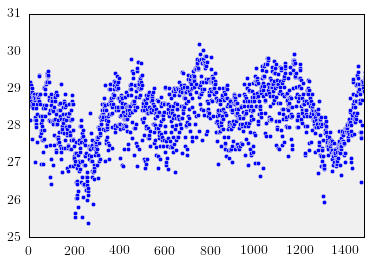

In [7]:
plt.xlim(0,1480)
plt.scatter(x,z)
plt.show()

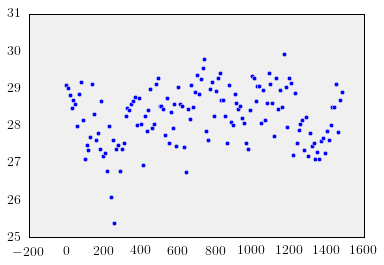

In [8]:
sample_x = np.asarray(x[0:1480:10])
sample_y = np.asarray(z[0:1480:10])
sample_y
plt.scatter(sample_x,sample_y)

In [9]:
sample_x

array([   0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  372,  382,  392,  403,  413,  423,  433,
        443,  453,  463,  473,  483,  493,  503,  513,  523,  533,  543,
        553,  563,  573,  583,  593,  603,  614,  624,  634,  644,  654,
        664,  674,  684,  694,  704,  714,  724,  734,  744,  754,  764,
        774,  784,  794,  804,  815,  825,  835,  846,  856,  866,  876,
        886,  896,  906,  916,  926,  936,  947,  959,  969,  979,  989,
        999, 1009, 1019, 1029, 1039, 1049, 1059, 1069, 1079, 1089, 1099,
       1109, 1119, 1129, 1139, 1149, 1160, 1170, 1180, 1190, 1200, 1210,
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1331, 1341, 1351, 1362, 1372, 1382, 1392, 1402, 1412, 1422, 1432,
       1442, 1452, 1462, 1472, 1482])